Lot of shape outputs to make sure everything is in correct dimension.


In [156]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

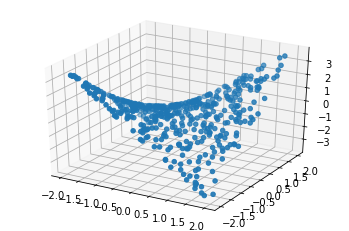

In [157]:
N = 500
X = np.random.random((N, 2))*4 - 2 # in between (-2, +2)
Y = X[:,0]*X[:,1] # makes a saddle shape
# note: in this script "Y" will be the target,
#       "Yhat" will be prediction

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()


In [158]:
D = 2
M = 100 # number of hidden units

# layer 1
W = np.random.randn(D, M) / np.sqrt(D)
b = np.zeros(M)

# layer 2
V = np.random.randn(M) / np.sqrt(M)
c = 0

In [189]:
print("W : ")
print(W.shape)
print("b : ")
print(b.shape)
print("V : ")
print(V.shape)
print("Y : "+str(Y.shape))

W : 
(2, 100)
b : 
(100,)
V : 
(100,)
Y : (500,)


In [185]:
def forward(X):
    Z = X.dot(W) + b
    Z = Z * (Z > 0) # relu
  # Z = np.tanh(Z)
    Yhat = Z.dot(V) + c
    print("X : "+str(X.shape))
    print("Z : "+str(Z.shape))
    print("Yhat : "+str(Yhat.shape))
    return Z, Yhat

In [208]:
def derivative_V(Z, Y, Yhat):
    print("Y-Yhat : "+str((Y-Yhat).shape))
    print("Z : "+str(Z.shape))
    print("(Y - Yhat).dot(Z) : "+str(((Y - Yhat).dot(Z)).shape))
    return (Y - Yhat).dot(Z)

def derivative_c(Y, Yhat):
    print("(Y - Yhat).sum() : "+str(((Y - Yhat).sum()).shape))
    return (Y - Yhat).sum()

def derivative_W(X, Z, Y, Yhat, V):
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(Y - Yhat, V) * (Z > 0) # relu
    return X.T.dot(dZ)

def derivative_b(Z, Y, Yhat, V):
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(Y - Yhat, V) * (Z > 0) # this is for relu activation
    print("dZ : "+str(dZ.shape))
    print("dZ.sum() : "+str(dZ.sum(axis=0).shape))
    return dZ.sum(axis=0)

def update(X, Z, Y, Yhat, W, b, V, c, learning_rate=1e-4):
    gV = derivative_V(Z, Y, Yhat)
    gc = derivative_c(Y, Yhat)
    gW = derivative_W(X, Z, Y, Yhat, V)
    gb = derivative_b(Z, Y, Yhat, V)

    V += learning_rate*gV
    c += learning_rate*gc
    W += learning_rate*gW
    b += learning_rate*gb

    return W, b, V, c

In [209]:
def get_cost(Y, Yhat):
    return ((Y - Yhat)**2).mean()

X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
0.04573784449192976
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-

dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yh

X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (500, 100)
(Y - Yhat).dot(Z) : (100,)
(Y - Yhat).sum() : ()
dZ : (500, 100)
dZ.sum() : (100,)
X : (500, 2)
Z : (500, 100)
Yhat : (500,)
Y-Yhat : (500,)
Z : (5

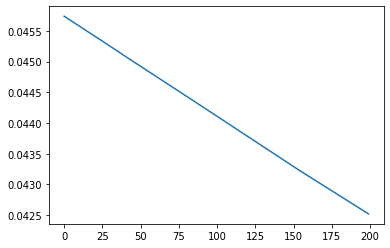

In [210]:
costs = []
for i in range(200):
    Z, Yhat = forward(X)
    W, b, V, c = update(X, Z, Y, Yhat, W, b, V, c)
    cost = get_cost(Y, Yhat)
    costs.append(cost)
    if i % 25 == 0:
        print(cost)

# plot the costs
plt.plot(costs)
plt.show()

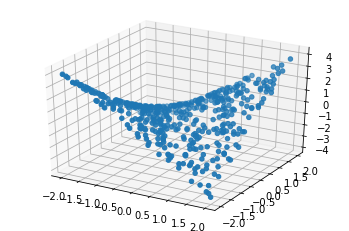

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [45]:
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
_, Yhat = forward(Xgrid)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

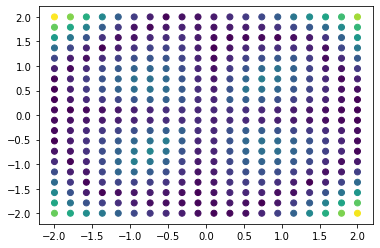

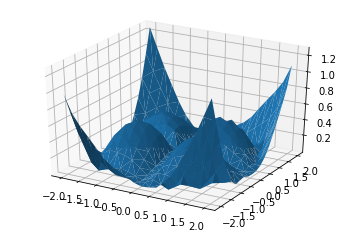

In [44]:
Ygrid = Xgrid[:,0]*Xgrid[:,1]
R = np.abs(Ygrid - Yhat)

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=R)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], R, linewidth=0.2, antialiased=True)
plt.show()
